# Kirby Detection using YOLOv5 (AI Camp Crash Course Project)
This project is designed to using bounding box to detect Kirby in images. Kirby is an adorable action-platform video game character developed by HAL Laboratory and published by Nintendo. 

**Note:**

This notebook could run in Google Colab directly. If you want to reproduce the training process in other environment, please change the relative paths accordingly.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Download
The data I use here is collected in Google Image Search and is labled using Roboflow.

In [ ]:
!pip install roboflow

In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="vBpZoEq9j50qc2xeJ8xZ")
project = rf.workspace("jinxuan-tang").project("kirby-detection---ai-camp-crash-course")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Kirby-Detection---AI-Camp-Crash-Course-2 in yolov5pytorch:: 100%|██████████| 270/270 [00:00<00:00, 1210.55it/s]


## Model Training & Process

### Load wandb

In [4]:
! pip install wandb -qqq

     |████████████████████████████████| 1.8 MB 5.5 MB/s 
     |████████████████████████████████| 181 kB 28.7 MB/s 
     |████████████████████████████████| 144 kB 34.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 


In [5]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### Load YOLOv5

In [6]:
import os
os.chdir('/content')

In [7]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.0/78.2 GB disk)


In [9]:
yolo_loc = os.getcwd()
print(os.getcwd())
data_loc = '/content/Kirby-Detection---AI-Camp-Crash-Course-2'

/content/yolov5


### Model Training

In [10]:
import shutil
shutil.copytree(data_loc, yolo_loc + '/Kirby-Detection---AI-Camp-Crash-Course-2')

'/content/yolov5/Kirby-Detection---AI-Camp-Crash-Course-2'

In [11]:
!python train.py --img 416 --batch 8 --epochs 200 --data {data_loc}/data.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: erisedtang (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=/content/Kirby-Detection---AI-Camp-Crash-Course-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

In [12]:
output_train_dir = 'runs/train/exp'
!ls {output_train_dir}

confusion_matrix.png				   R_curve.png
events.out.tfevents.1650576095.1772e2aff100.448.0  results.csv
F1_curve.png					   results.png
hyp.yaml					   train_batch0.jpg
labels_correlogram.jpg				   train_batch1.jpg
labels.jpg					   train_batch2.jpg
opt.yaml					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   weights


In [13]:
# Save model and result to Google Drive
save_path = '/content/drive/MyDrive/AI Camp/Crash Course'
shutil.copytree(output_train_dir, save_path + '/train')

'/content/drive/MyDrive/AI Camp/Crash Course/train'

## Result Visulization

### Batch Process

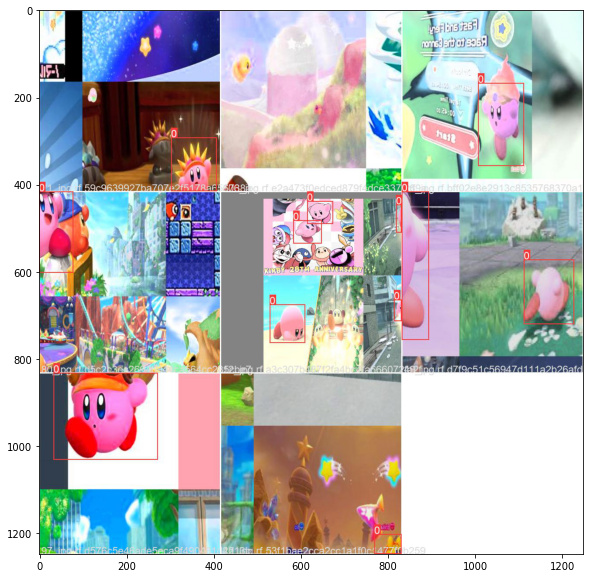

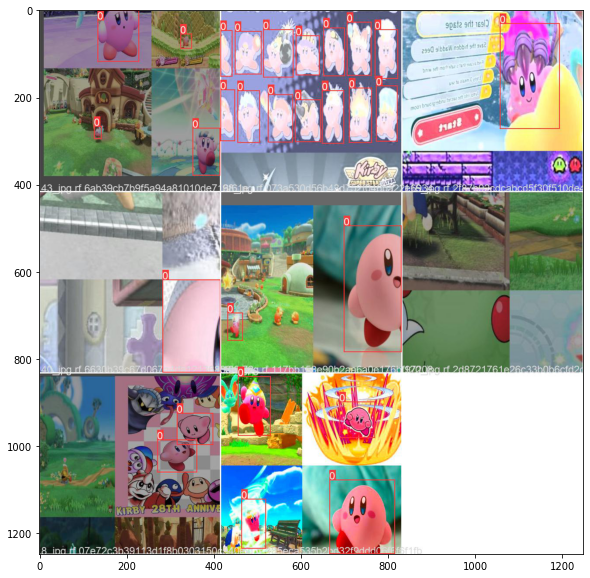

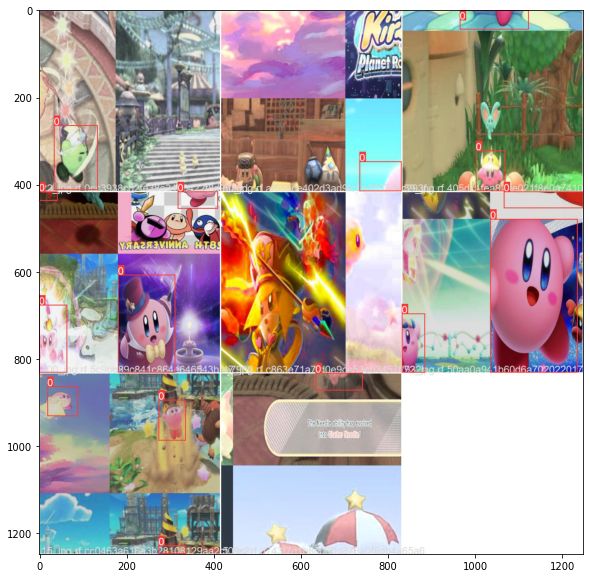

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.imshow(plt.imread(f'{output_train_dir}/train_batch0.jpg'))

plt.figure(figsize = (10, 10))
plt.imshow(plt.imread(f'{output_train_dir}/train_batch1.jpg'))

plt.figure(figsize = (10, 10))
plt.imshow(plt.imread(f'{output_train_dir}/train_batch2.jpg'))

### Ground True V.S. Predict

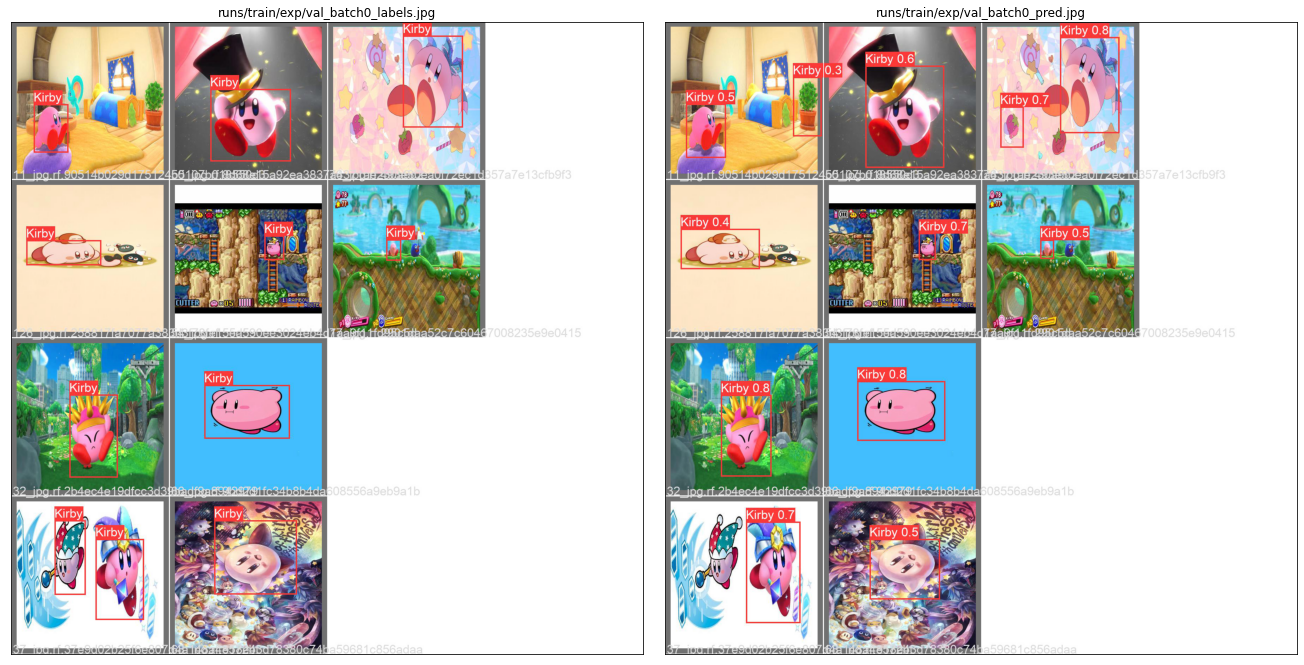

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (2*9,3*5), constrained_layout = True)

ax[0].imshow(plt.imread(f'{output_train_dir}/val_batch0_labels.jpg'))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title(f'{output_train_dir}/val_batch0_labels.jpg', fontsize = 12)

ax[1].imshow(plt.imread(f'{output_train_dir}/val_batch0_pred.jpg'))
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title(f'{output_train_dir}/val_batch0_pred.jpg', fontsize = 12)
plt.show()

### Score V.S. Epoch

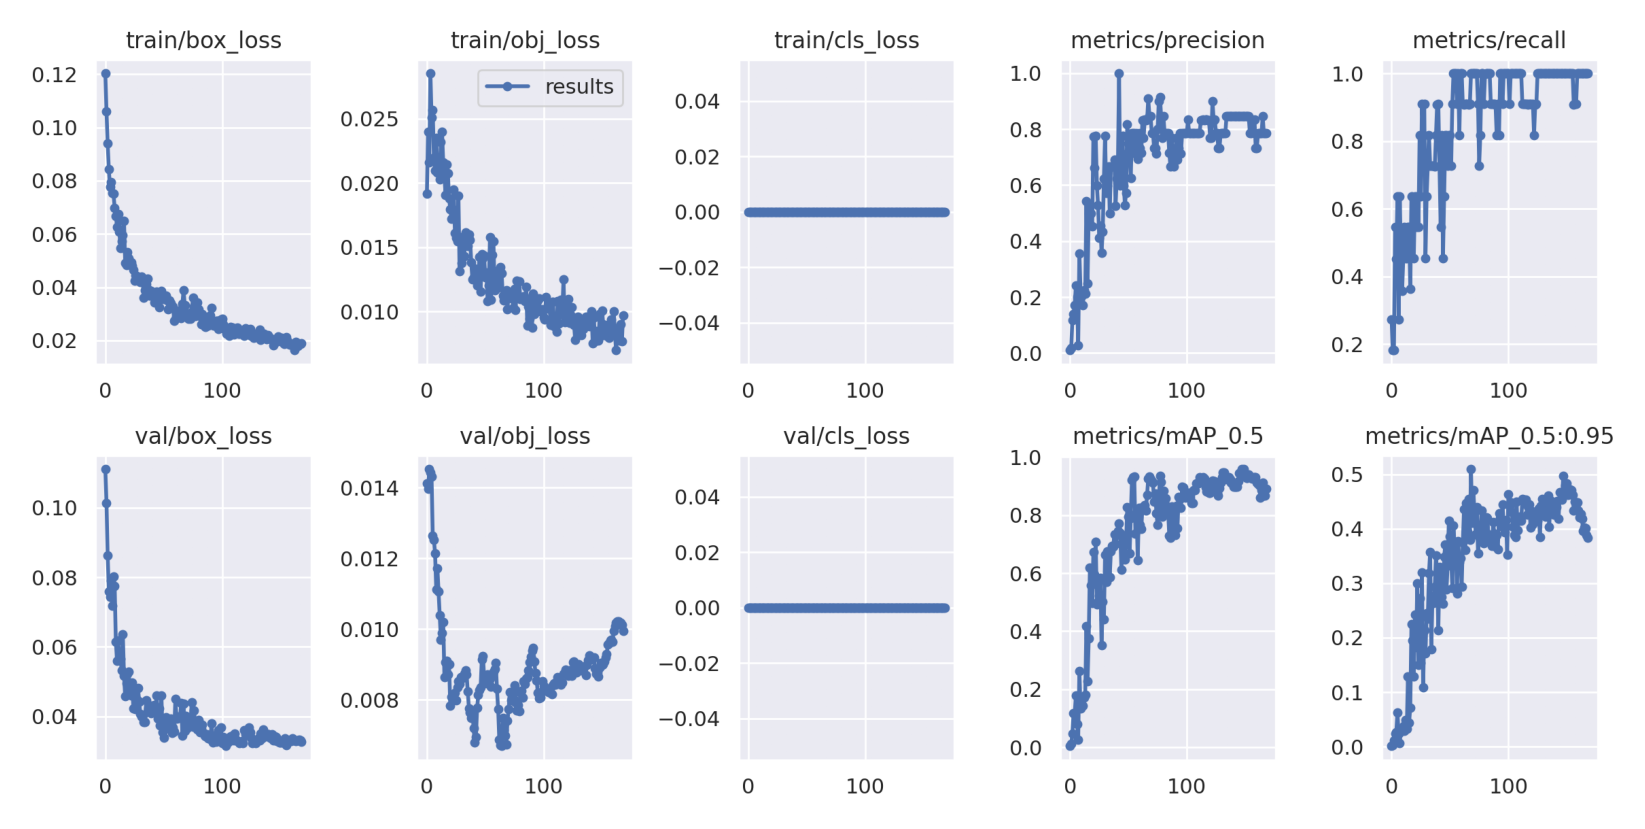

In [22]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread(f'{output_train_dir}/results.png'));

### Confusion Matrix

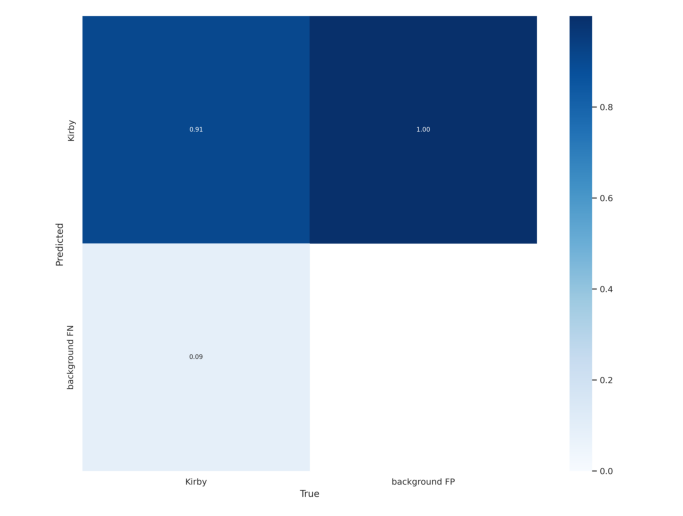

In [23]:
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(plt.imread(f'{output_train_dir}/confusion_matrix.png'));

### Metrics

Metric: F1


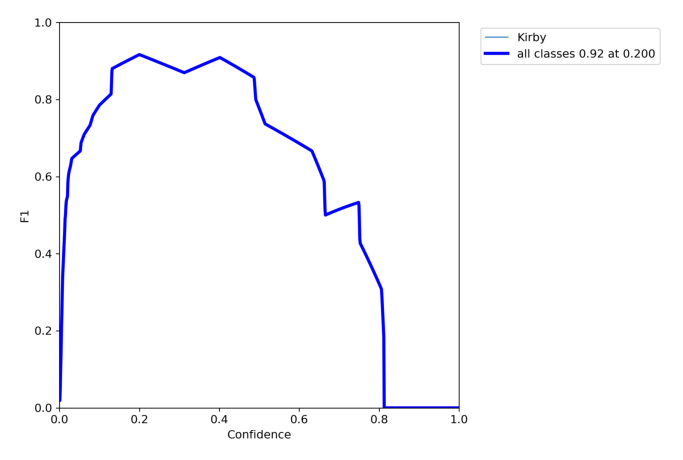

Metric: PR


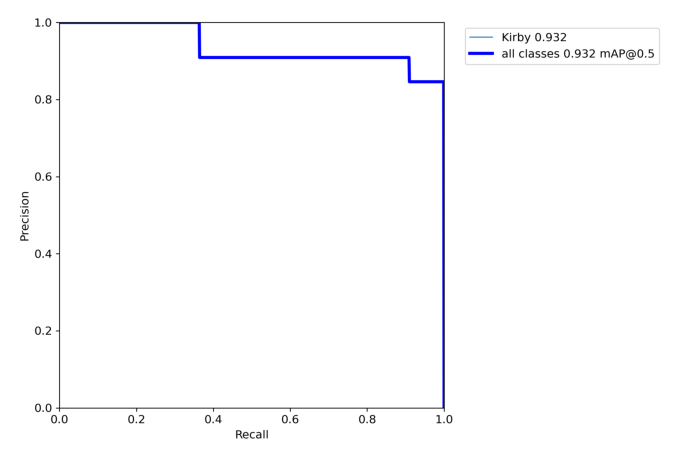

Metric: P


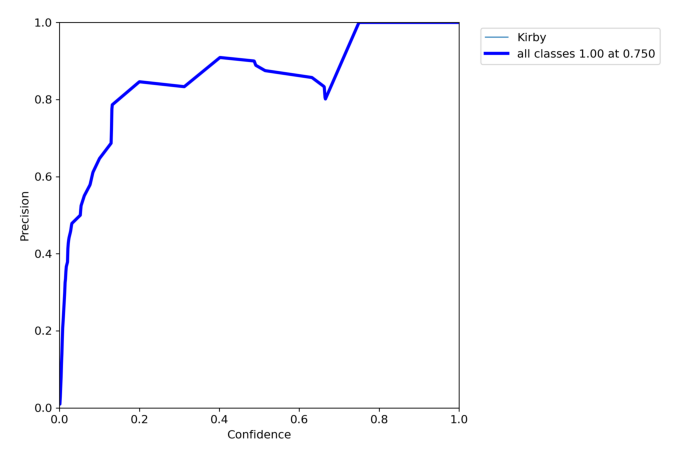

Metric: R


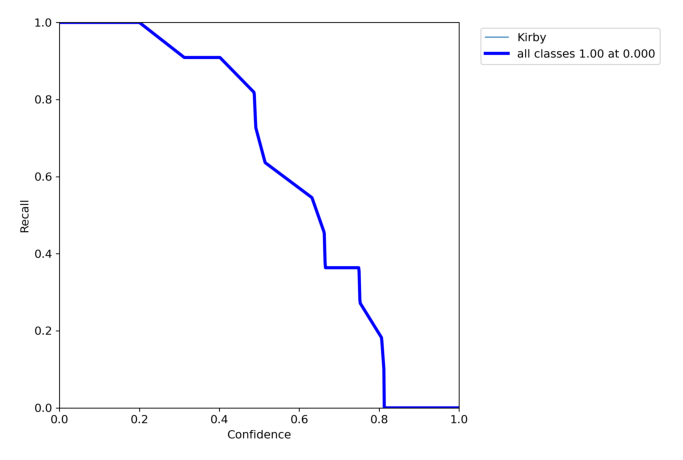

In [24]:
for metric in ['F1', 'PR', 'P', 'R']:
    print(f'Metric: {metric}')
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(plt.imread(f'{output_train_dir}/{metric}_curve.png'));
    plt.show()

## Model Testing

In [25]:
!python detect.py --weights {output_train_dir}/weights/best.pt --img 416 --conf 0.1 --source {data_loc}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/Kirby-Detection---AI-Camp-Crash-Course-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/11 /content/Kirby-Detection---AI-Camp-Crash-Course-2/test/images/104_jpg.rf.00af1d06471c42baab7f3a50eec774f6.jpg: 416x416 1 Kirby, Done. (0.028s)
image 2/11 /content/Kirby-Detection---AI-Camp-Crash-Course-2/test/images/114_jpg.rf.1e3834e663c719e7163af952704d557e.jpg: 416x416 1 Kirby, Done. (0.028s)
image 3/11 /content/Kirb

In [27]:
# Save test result to Google Drive
shutil.copytree('runs/detect/exp', save_path + '/infer')

'/content/drive/MyDrive/AI Camp/Crash Course/infer'

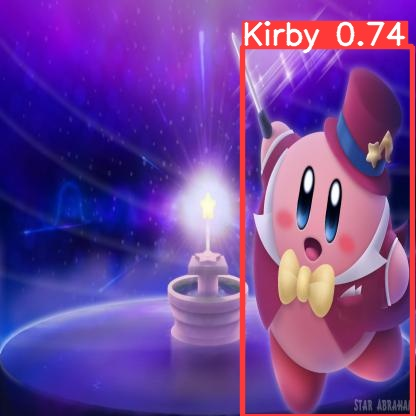

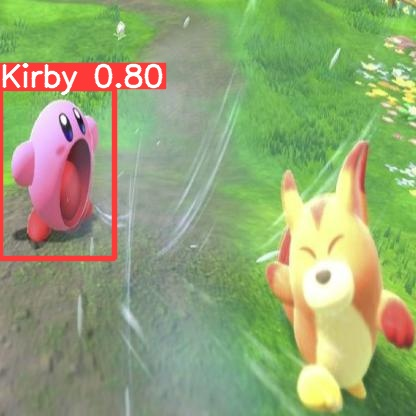

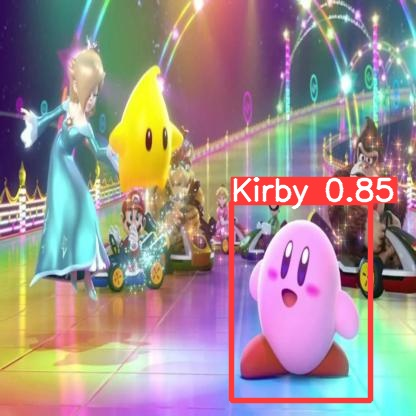

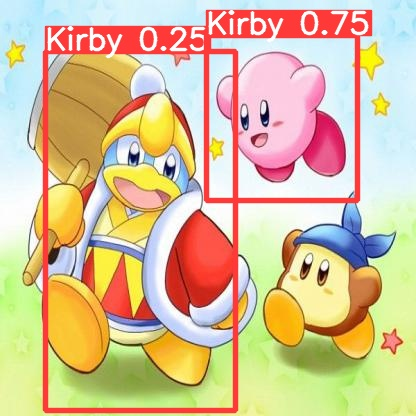

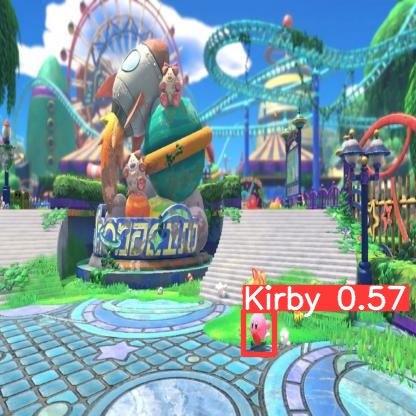

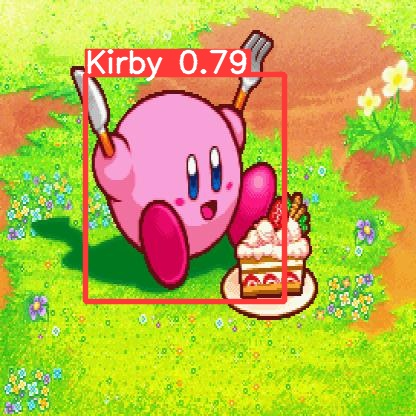

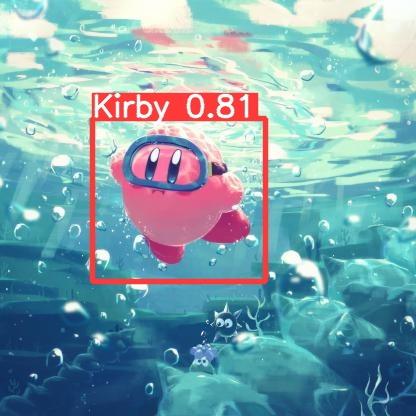

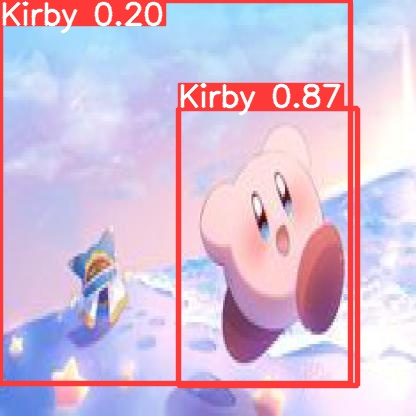

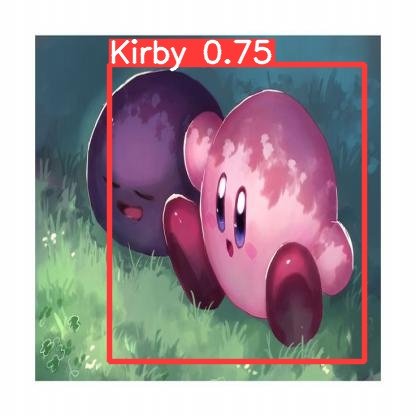

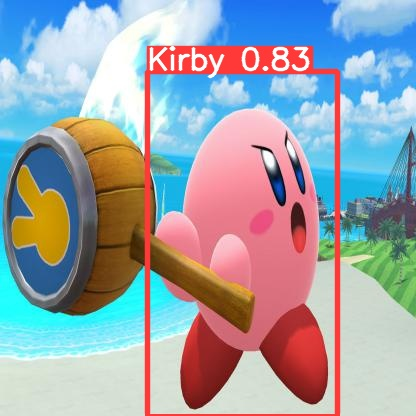

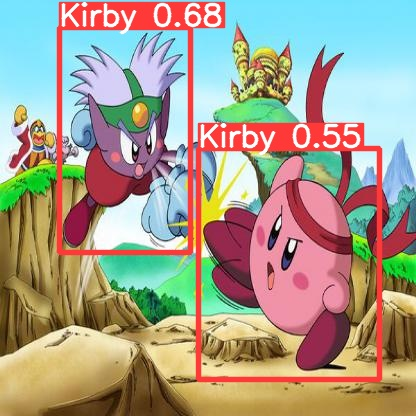

In [26]:
import cv2
from google.colab.patches import cv2_imshow



base_dir = 'runs/detect/exp/'

for image in os.listdir(base_dir):

    detect_result = cv2.imread(base_dir+image)

    cv2_imshow(detect_result)